In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
training_data= pd.read_csv('C:/Users/Admin/Downloads/training_data.csv')
test_data= pd.read_csv('C:/Users/Admin/Downloads/test_data.csv')

In [3]:
training_data=training_data.set_index([pd.Index(training_data["PatientID"])])

In [4]:
training_data=training_data.drop('PatientID',axis=1)

In [5]:
test_data=test_data.set_index([pd.Index(test_data["PatientID"])])
test_data=test_data.drop('PatientID',axis=1)

In [6]:
training_data['PR Seq'].value_counts()

CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAGGGGGGCAACTAAAGGAAGCYCTATTAGATACAGGAGCAGATGATACAGTATTAGAAGACATGGAGTTGCCAGGAAGATGGAAACCAAAAATGATAGGGGGAATTGGAGGTTTTATCAAAGTAARACAGTATGATCAGRTACCCATAGAAATCTATGGACATAAAGCTGTAGGTACAGTATTAATAGGACCTACACCTGTCAACATAATTGGAAGAAATCTGTTGACTCAGCTTGGTTGCACTTTAAATTTY    1
CCTCAGATCACTCTTTGGCAACGACCCCTCGTCTCAATAAGGGTAGGGGGGCAACTAAAGGAAGCTCTATTAGAYACAGGAGCAGATGATACAGTATTAGAAGARATAGATTTGCCAGGAAGATGGAAACCAAAAATGATAGGGGGAATTGGAGGTTTTATCAAAGTAARACAGTATGATCAGATACCCATAGAAATTTGTGGGCATAAAGCTATAGGTACAGTATTAGTAGGACCTACACCTGTCAACATAATTGGAAGAAATCTGTTGACTCAGATYGGTTGCACTTTAAATTTT    1
CCTCAGATCACTCTTTGGCAACGACCCCTCGTCTCAGTAARGATAGGGGGGCARCTAAAGGAAGCTCTCTTAGAYACAGGAGCAGATGATACAGTRTTAGAAGAMATGAATTTGCCAGGAAGATGGAAACCAAAAATGATAGGGGGAATTGGAGGTTTTATCAAAGTAAGACAGTATGATCAGATACCCATAGAAATCTGTGGACATAAAGCTATAGGTACAGTATTAGTAGGACCTACACCTGTCAACATAATTGGACGAAATCTGTTGACTCAGATTGGYTGCACTTTAAATTTY    1
CCTCAGATCACTCTTTGGCAACGACCCCTCGTCTCARTAARRATAGGAGGGCAAMTCAAGGAAGCTCTATTAGATACAGGAGCAGATGATA

In [7]:
training_data[training_data['PR Seq'].isnull()]

,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
PatientID,,,,,
921,0,NaN,GAAATSTGTACAGAAATGSAAAAGGAAGGGAAAATTTCAAAAATTG...,4.10,227
922,0,NaN,AAATTAAAGCCAGGAATGGATGGCCCAAAGGTTAAACAATGGCCAT...,3.20,287
923,0,NaN,AGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAATGGATG...,3.00,638
924,1,NaN,CCCATAAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.50,699
925,0,NaN,CCCATAAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,2.70,299
...,...,...,...,...,...
996,0,NaN,CCCATTAGTCCTATTGARACTGTACCAGTAMAATTAAAGCCAGGAA...,3.15,354
997,0,NaN,CCCATYAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.50,50
998,0,NaN,CCCATYAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.10,369


In [8]:
training_data=training_data.dropna()

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 920
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Resp    920 non-null    int64  
 1   PR Seq  920 non-null    object 
 2   RT Seq  920 non-null    object 
 3   VL-t0   920 non-null    float64
 4   CD4-t0  920 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.1+ KB


In [10]:
X_train = training_data.drop('Resp',axis=1)
y_train = training_data['Resp']

In [11]:
X_test = test_data.drop('Resp',axis=1)
y_test = pd.read_csv('C:/Users/Admin/Downloads/hivprogression_solution.csv',index_col="PatientID",)

In [12]:
y_test

,ResponderStatus
PatientID,
1,1
2,0
3,1
4,0
5,1
...,...
688,1
689,1
690,1


In [13]:
PR_train = [-sum([ord(ele)-96 for ele in sub]) for sub in X_train["PR Seq"]]
pr_test = [-sum([ord(ele)-96 for ele in sub]) for sub in X_test["PR Seq"]]

In [14]:
RT_train = [-sum([ord(ele)-96 for ele in sub]) for sub in X_train["RT Seq"]]
RT_test = [-sum([ord(ele)-96 for ele in sub]) for sub in X_test["RT Seq"]]

In [15]:
RT_train

[25262,
 22731,
 22497,
 36732,
 22497,
 22588,
 22482,
 22581,
 22580,
 22523,
 22003,
 36273,
 36308,
 36854,
 22400,
 21584,
 18729,
 22557,
 37011,
 22867,
 18940,
 22536,
 22530,
 18778,
 25197,
 22190,
 36262,
 25139,
 36432,
 22723,
 21670,
 27799,
 24369,
 18665,
 17185,
 22466,
 18772,
 25277,
 22478,
 22510,
 21778,
 36955,
 18730,
 18838,
 25231,
 25221,
 22575,
 37043,
 22835,
 22518,
 18701,
 22617,
 18694,
 24105,
 19366,
 22631,
 22529,
 21368,
 22546,
 19544,
 22296,
 18687,
 22455,
 22691,
 22523,
 22775,
 22538,
 22646,
 22645,
 20897,
 22746,
 24367,
 22445,
 18724,
 22573,
 24348,
 22599,
 25252,
 22732,
 25267,
 18702,
 18705,
 18788,
 22596,
 22815,
 28003,
 21166,
 22636,
 22471,
 22922,
 22512,
 22889,
 22522,
 36737,
 22469,
 22599,
 22071,
 22604,
 36357,
 24144,
 22541,
 20053,
 20233,
 25272,
 22388,
 25028,
 22515,
 22901,
 22116,
 18692,
 22427,
 24312,
 24078,
 22148,
 22582,
 24046,
 25255,
 17378,
 22433,
 18707,
 22578,
 25217,
 24384,
 22745,
 25189,


In [16]:
X_train["PR_Seq"] = PR_train
X_train["RT_Seq"] = RT_train
X_test["PR_Seq"] = pr_test
X_test["RT_Seq"] = RT_test

In [17]:
X_train=X_train.drop(["PR Seq","RT Seq"],axis=1)

In [18]:
X_test=X_test.drop(["PR Seq","RT Seq"],axis=1)

In [19]:
X_test

,VL-t0,CD4-t0,PR_Seq,RT_Seq
PatientID,,,,
1,5.60,69,5623,36126
2,5.30,119,5645,36270
3,5.70,41,6068,22432
4,5.20,48,6057,36854
5,5.50,311,6052,22557
...,...,...,...,...
688,5.30,366,7295,18921
689,4.90,151,7230,36930
690,4.90,411,7301,21778


In [20]:
y_test

,ResponderStatus
PatientID,
1,1
2,0
3,1
4,0
5,1
...,...
688,1
689,1
690,1


In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [24]:
training_data_accuracy

0.8076086956521739

In [25]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [26]:
test_data_accuracy 

0.5910404624277457

In [31]:
input_data = (5.25,239,7292,21354)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are prediction for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)


if (prediction==1):
    print('The person has a HIV')
else:
    print('The person does not have a HIV')

The person does not have a HIV


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
import seaborn as sns

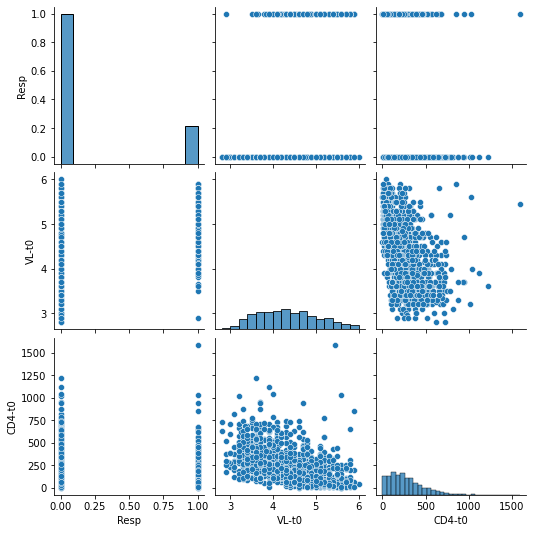

In [29]:
sns.pairplot(training_data)